# <font face = "微软雅黑" color = blue size = 6>实验名称</font>

## 关系数据可视化

# <font face = "微软雅黑" color = blue size = 6>实验目的</font>

## 通过该实验的实践，要求学生可以理解数据的关联性和分布性，掌握Matplotlib和pyecharts的使用过程，能够熟练绘制常见的适合展示关系数据的图表。

# <font face = "微软雅黑" color = blue size = 6>实验背景</font>

## 关系数据源于2个或2个以上变量取值之间在某种意义下所存在的规律，其目的在于探寻数据集里所隐藏的相关关系网。研究关系数据主要从两个方向进行：一是相关分析，通过引入一定的统计指标量化变量之间的相关程度；另一个是分布分析，刻画数据的内部布局。

# <font face = "微软雅黑" color = blue size = 6>实验原理</font>

## 关系数据主要包括数据关联性和数据分布性

## 多元变量之间的关系，可以使用散点图，散点矩阵图，或者平行坐标图呈现

## 数据的分布，可以使用直方图、箱线图呈现

# <font face = "微软雅黑" color = blue size = 6>实验环境</font>

## Python 3.6.5

## pyecharts 0.5.11

## matplotlib 3.2.0

## pandas 1.1.0

# <font face = "微软雅黑" color = blue size = 6>实验步骤</font>

## 2 环境准备，安装所需的库

## 2 安装pyecharts

In [9]:
!pip install pyecharts==0.5.11 

  Using cached pyecharts-0.5.11-py2.py3-none-any.whl (122 kB)
  Using cached jupyter_echarts_pypkg-0.1.2-py3-none-any.whl
  Using cached pyecharts_javascripthon-0.0.6-py2.py3-none-any.whl (9.3 kB)
  Using cached javascripthon-0.12-py3-none-any.whl (526 kB)
  Using cached dukpy-0.2.3.tar.gz (1.9 MB)
  Created wheel for dukpy: filename=dukpy-0.2.3-cp39-cp39-win_amd64.whl size=1262292 sha256=1609f947e7b557840389fe596c15159946228050b8dec8c4b600bd3a3378703c
  Stored in directory: c:\users\lenov\appdata\local\pip\cache\wheels\68\81\1c\587c6743986b3153a950f942e68a487e6c5a8873aa06680262
Successfully built dukpy


In [1]:
pip install pyecharts_snapshot --proxy http://127.0.0.1:10901

Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


## 3 散点图

In [1]:
#下载实验数据：http://i9000.net:8888/sgn/LMS/Visual/7/crimeRatesByState2005.csv

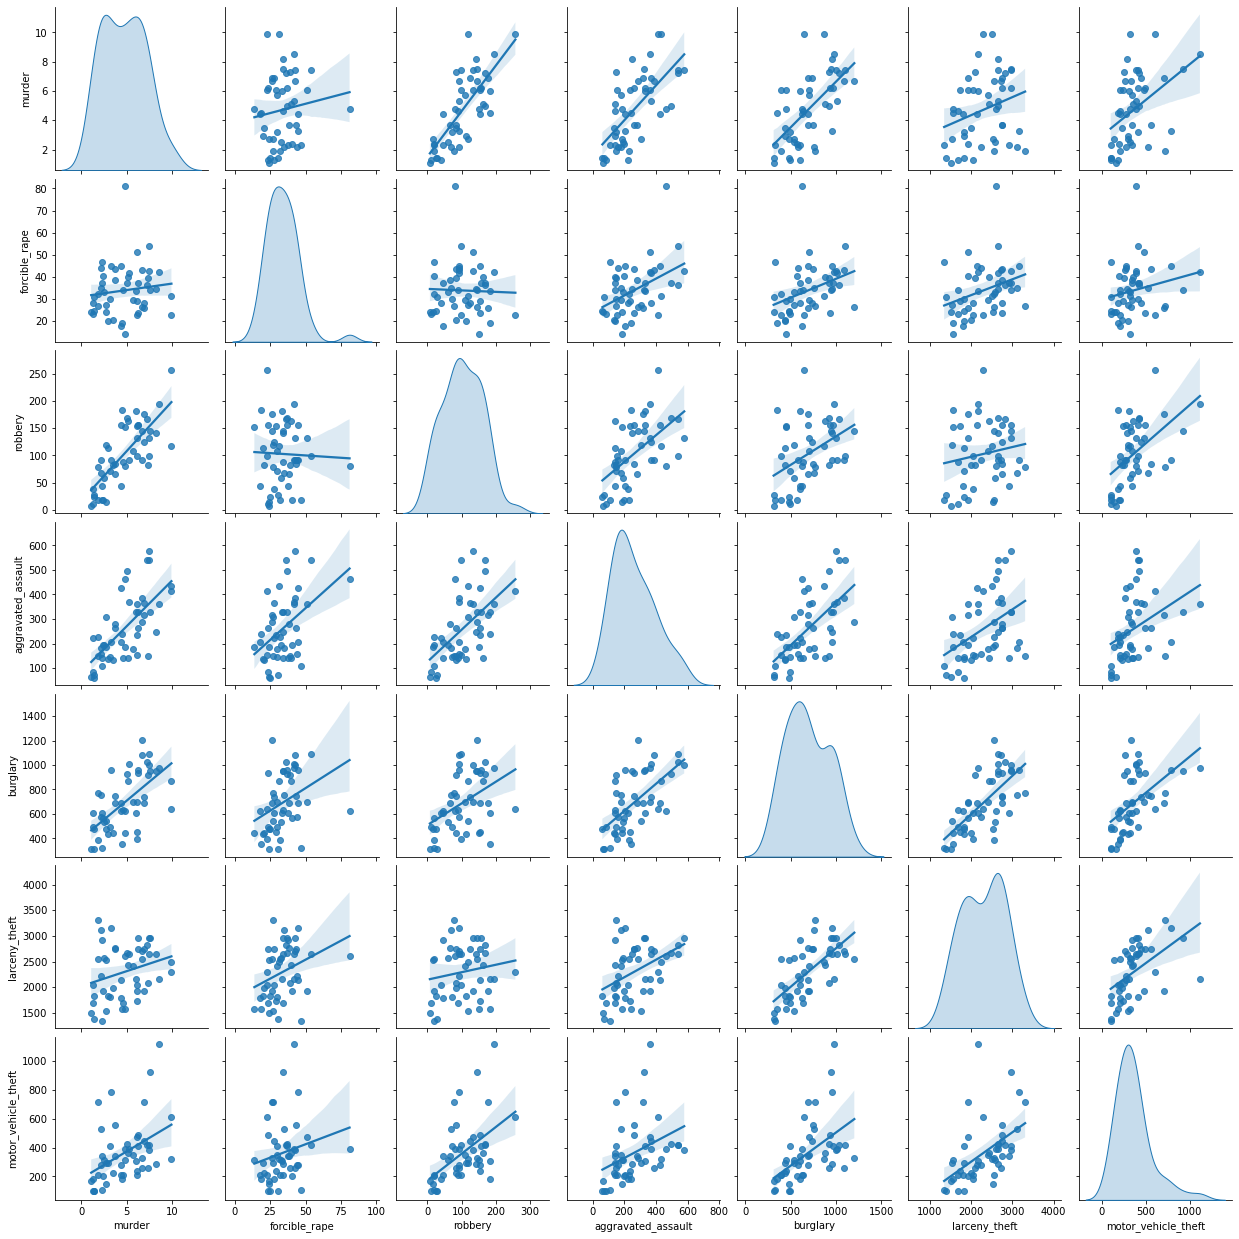

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#读取数据
crime=pd.read_csv("./crimeRatesByState2005.csv")
#去除掉state为United States的数据
crime2 = crime[crime.state != "United States"]
#去除掉state为District of Columbia的数据
crime2 = crime2[crime2.state != "District of Columbia"]
#删除state列
crime2=crime2.drop(['state'],axis=1)
#删除population列
crime2=crime2.drop(['population'],axis=1)
#绘制成对关系图
g = sns.pairplot(crime2, diag_kind="kde",kind="reg")
plt.show()#显示图表

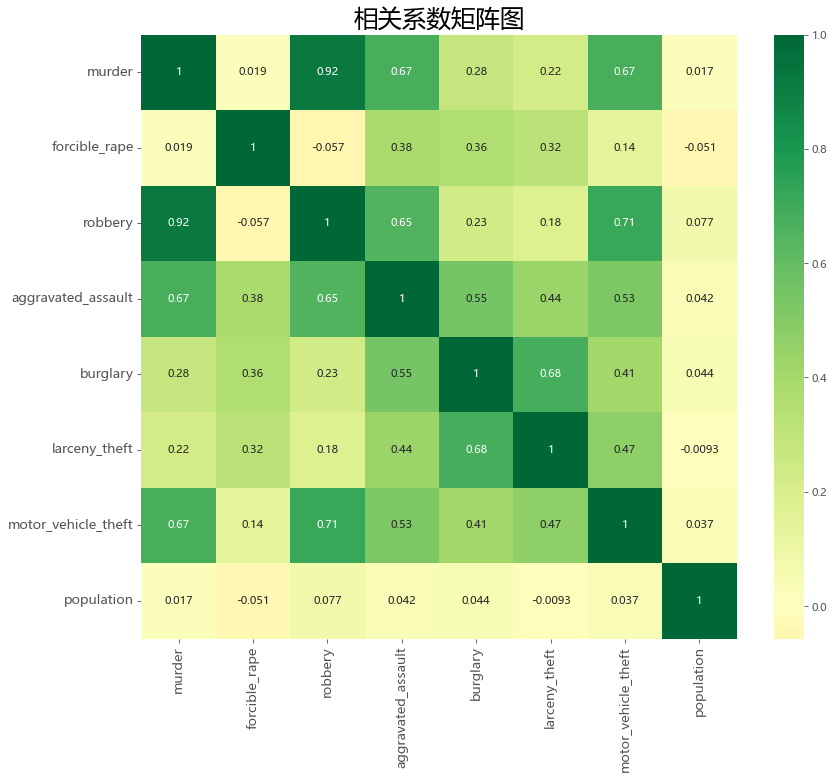

In [20]:
# 加载数据
df = pd.read_csv("./crimeRatesByState2005.csv")

# 绘制相关系数矩阵图
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# 绘图装饰
plt.title('相关系数矩阵图', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## 4 气泡图

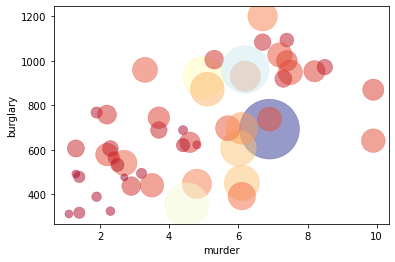

In [6]:
import matplotlib.pyplot as plt
import pandas  as pd
import  numpy as np
#读取数据
crime=pd.read_csv("./crimeRatesByState2005.csv")
#删除state为United States的数据
crime2 = crime[crime.state != "United States"]
#删除state为District of Columbia的数据
crime2 = crime2[crime2.state != "District of Columbia"]
z = list(crime2.population/10000)#取人口数据
colors = np.random.rand(len(list(crime2.murder)))#根据谋杀率随机去颜色
cm = plt.cm.get_cmap('RdYlBu')#使用色谱RdYlBu
plt.scatter(list(crime2.murder), list(crime2.burglary), s=z,c=z,cmap = cm, linewidth = 0.5, alpha     = 0.5)#绘制散点图
plt.xlabel("murder")
plt.ylabel("burglary")
plt.show()

## 5 气泡图2

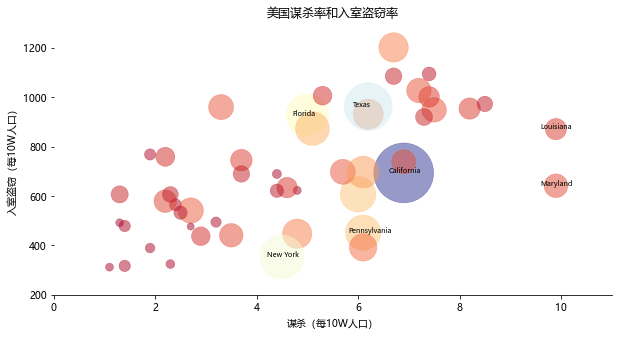

In [11]:
"""
功能：气泡图
"""
import matplotlib.pyplot as plt
import pandas  as pd
import  numpy as np

plt.rcParams['font.sans-serif'] = ['Microsoft YaHei'] # 解决中文不能正常显示的问题
crime=pd.read_csv("./crimeRatesByState2005.csv")

#print (list(crime.murder)) # murder是列名
crime2 = crime[crime.state != "United States"] # 排除state为United States的这一行
crime2 = crime2[crime2.state != "District of Columbia"] # 排除state为District of Columbia这一行

z = list(crime2.population/10000)#取人口数作为气泡的大小的参考
colors = np.random.rand(len(list(crime2.murder)))#根据谋杀率取颜色
cm = plt.cm.get_cmap('RdYlBu')#使用色谱RdYlBu

fig,ax=plt.subplots(figsize=(10,5))#创建画布
ax.scatter(list(crime2.murder), list(crime2.burglary), s=z,c=z,cmap=cm, linewidth=0.5, alpha=0.5)#绘制气泡图
#ax.xlabel("murder")
#ax.ylabel("burglary")


# 图形不支持中文显示
ax.set(xlim=(0,11),ylim=(200,1300),\
       xlabel="谋杀（每10W人口）",\
       ylabel="入室盗窃（每10W人口）",\
       title="美国谋杀率和入室盗窃率")#设置标签、标题的格式
"""
ax.set(xlim=(0,11),ylim=(200,1300),\
       xlabel="murder",\
       ylabel="burglary")
"""
# 特殊处理state，只显示部分地方
state_show = []
#遍历各州的数据
for sta in list(crime2.state):
    #print(sta)
    if(sta == 'California'or
    sta == 'Florida' or
    sta == 'Texas' or
    sta == 'New York' or
    sta == 'Pennsylvania' or
    sta == 'Louisiana' or
    sta == 'Maryland'):
        state_show.append(sta)
    else:
        state_show.append('')

#print(state_show)
# 显示所有气泡的state名称
#for i,j,k in zip(crime2.murder,crime2.burglary,crime2.state):
for i, j, k in zip(crime2.murder, crime2.burglary, state_show):
    plt.text(x=i-0.3,y=j-0.1,s=k,fontsize=7)
ax.spines["top"].set_visible(False)#不显示上边框
ax.spines["left"].set_visible(False)#不显示下边框
ax.spines["right"].set_visible(False)#不显示右边框

plt.show()#显示图表

## 6 茎叶图

In [ ]:
#下载实验数据：http://i9000.net:8888/sgn/LMS/Visual/7/birth-rate.csv

In [12]:
import  numpy as np
import math
from itertools import groupby
import pandas  as pd
#读取数据
birth=pd.read_csv("./birth-rate.csv")
#去除掉空值
birth.dropna(subset=[ '2008'], inplace= True)
dirt={}
data = list(round(birth ['2008'],1))#转换数据
rangenum = []
#先把数据排序，再根据值进行分布，进行取余取商运算
for k,g in groupby(sorted(data),key = lambda x: int(x)):
    lst = map(str,list(map(lambda y: divmod(int(y*10),10)[1],list(g))))
    dirt[k] = ' '.join(lst)
    rangenum.append(k)
num = list(range(rangenum[0],rangenum[-1],2))
for i in num:
    a =''
    for k in sorted(dirt.keys()):
        if 0<=k-i <=1:
            a = a +' ' + dirt[k]
        elif k-i > 1:
            break
    print(str(i).rjust(5), '|', a)

    8 |  2 3 7 1 3 3 4 4 6 8 9 9 9
   10 |  0 1 2 2 3 4 5 5 5 6 6 9 9 9 0 0 1 2 2 2 2 3 4 5 5 5 7 7 7 8 8 9
   12 |  0 0 0 1 1 1 1 1 3 5 6 7 8 9 9 9 3 7 8 9
   14 |  0 0 3 4 5 6 6 7 8 8 9 9 1 2 3 7
   16 |  2 2 7 7 7 9 1 2 3 6 7 7 8 8 9
   18 |  0 0 2 3 3 6 7 7 8 8 8 9 0 0 4 4 8
   20 |  0 0 2 4 4 4 5 6 8 8 9 1 2 4 5 5 6 7 9
   22 |  0 0 5 7 8 3 4 5 7 9
   24 |  1 1 4 5 6 6 7 7 7 7 1 3 4 7
   26 |  3 1 3 3 5 6 6 7
   28 |  0 1 4 9 9 9
   30 |  1 2 4 2 3 4
   32 |  1 4 4 9 0 6 9
   34 |  5 5 6 0 4 9
   36 |  8 8 9 0
   38 |  0 2 3 4 5 5 8 2 3 4 6 8
   40 |  2 3 1 2 5
   42 |  6 9 9
   44 |  1 7
   46 |  2 5 2
   48 | 
   50 | 
   52 |  5


## 7 直方图

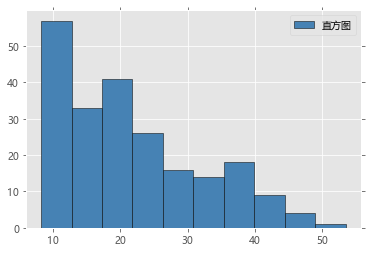

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 解决中文不能正常显示的问题
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams[ 'axes.unicode_minus'] = False
#plt.rcParams['font.sans-serif'] = ['SimHei'] 
#读取数据
titanic = pd.read_csv( './birth-rate.csv')
#去除空值
titanic.dropna(subset=[ '2008'], inplace= True)
plt.style.use( 'ggplot')
#绘制直方图
plt.hist(titanic['2008'], bins = 10, color = 'steelblue', edgecolor = 'k', label = "直方图")
plt.tick_params(top= 'off', right= 'off')#右侧，顶侧不显示刻度
plt.legend()#显示图例
plt.show()#显示图表

## 8 密度图

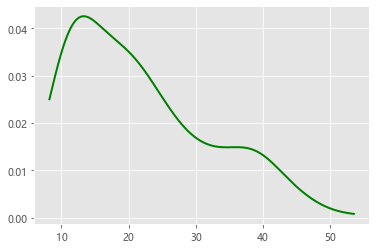

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
#解决中文乱码
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams[ 'axes.unicode_minus'] = False
#读取数据
titanic = pd.read_csv( './birth-rate.csv')
#去除空值
titanic.dropna(subset=[ '2008'], inplace= True)
#使用kde密度图
kde = mlab.GaussianKDE(titanic['2008'])
#取最大值和最小值之间1000个均匀分割的数
x2 = np.linspace(titanic['2008'].min(), titanic['2008'].max(), 1000)
line2 = plt.plot(x2,kde(x2), 'g-', linewidth = 2)#绘制折线图
plt.show()#显示图表

##  9 峰峦图

In [23]:
!pip install joypy --proxy http://127.0.0.1:10901

<Figure size 1280x800 with 0 Axes>

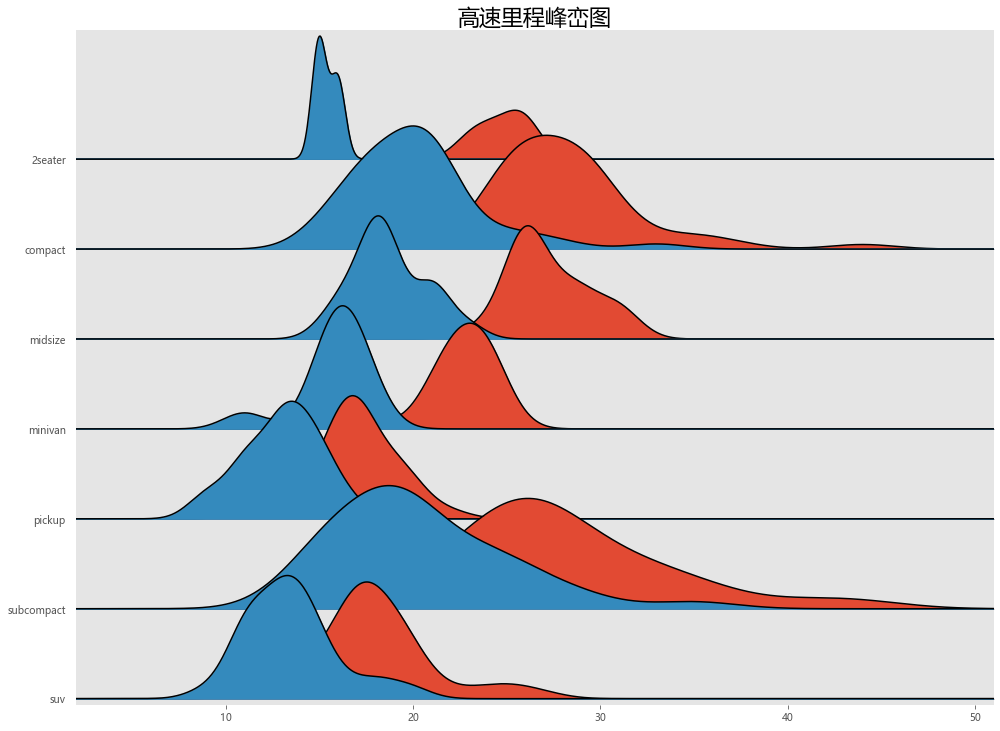

In [25]:
#应用过去给到大家的mpg_ggplot2.csv实验数据

import joypy
# 加载数据
mpg = pd.read_csv("./mpg_ggplot2.csv")

# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
fig, axes = joypy.joyplot(mpg, column=['hwy', 'cty'], by="class", ylim='own', figsize=(14,10))

# Decoration
plt.title('高速里程峰峦图', fontsize=22)
plt.show()

## 10 大提琴图

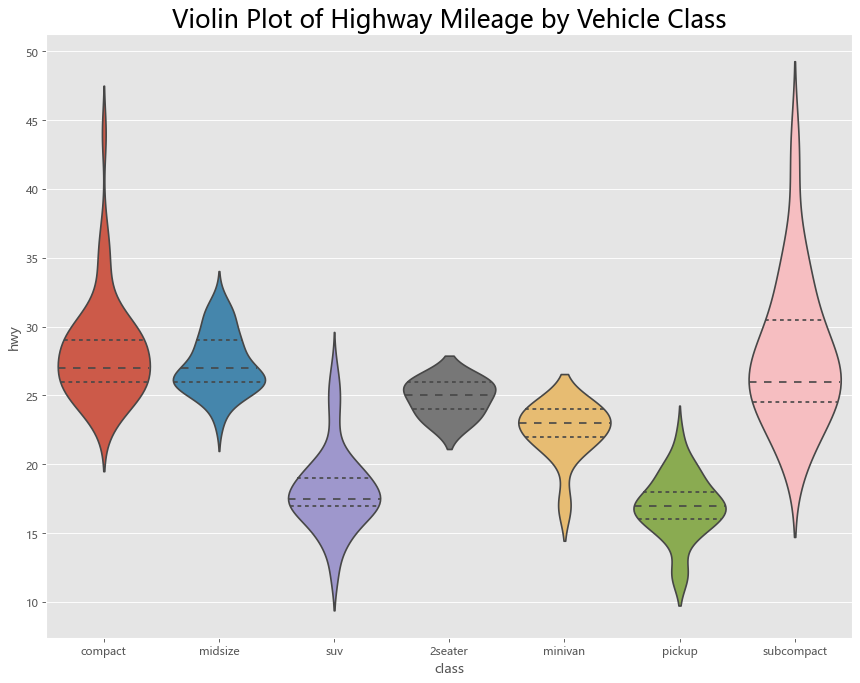

In [27]:
# 加载数据
df = pd.read_csv("./mpg_ggplot2.csv")

# 绘图
plt.figure(figsize=(13,10), dpi= 80)
sns.violinplot(x='class', y='hwy', data=df, scale='width', inner='quartile')

# 绘图装饰
plt.title('Violin Plot of Highway Mileage by Vehicle Class', fontsize=22)
plt.show()

# <font face = "微软雅黑" color = blue size = 6>实验总结</font>

## 在实验中，通过实践练习，提高学生使用Matplotlib和pyecharts进行文本数据可视化的熟练程度，总结适合展示文本数据的图表，能够解释文本数据所包含的实际意义。